In [0]:
from sklearn.datasets import fetch_openml
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

## Use the fetch openml command from sklearn.datasets to import the MNIST data set

In [0]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

## Use Random Forests to try to get the best possible test accuracy on MNIST. This involves getting acquainted with how Random Forests work, understanding their parameters, and therefore using Cross Validation to ﬁnd the best settings. How well can you do? You should use the accuracy metric, since this is what you used in Lab 5 – therefore this will allow you to compare your results from Random Forests with your results from L1- and L2- Regularized Logistic Regression. What are the hyperparameters of your best model?

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
params={'criterion':('gini','entropy'),
            'max_depth': (3,5,7,9),
            'min_samples_leaf':(3,5,8,10)}

In [0]:
rf = RandomForestClassifier()

In [0]:
clf = GridSearchCV(rf, param_grid=params, cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 10}

In [0]:
clf.best_score_

0.9165918367346939

In [0]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9174761904761904

## Use Boosting to do the same. Take the time to understand how XGBoost works (and/or other boosting packages available). Try your best to tune your hyper-parameters. As added motivation: typically the winners and near-winners of the Kaggle competition are those that are best able to tune an cross validate XGBoost. What are the hyperparameters of your best model?

In [0]:
import xgboost as xgboost
xgb = xgboost.XGBClassifier(objective='multi:softmax', num_class=10)

In [0]:
# decrease the size of training set due to the time constraints 
# took about half an hour to run on only 10% of the whole data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

In [0]:
xgb_parameters = {
  'max_depth': [3,5,7],
  'learning_rate':[0.01,0.05,0.1,0.2]
}

In [0]:
xgb_model = GridSearchCV(xgb, xgb_parameters, cv=5, n_jobs=-1)
xgb_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, num_class=10,
                                     objective='multi:softmax', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7]},
    

In [0]:
xgb_model.best_params_

{'learning_rate': 0.2, 'max_depth': 5}

In [0]:
xgb_model.best_score_

0.9427142857142857

In [0]:
y_pred1 = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred1)

0.9457777777777778

## In this problem you will explore the data set CIFAR-10, just as you did above for MNIST. Nowthat you have your pipeline set up, it should be easy to apply the above procedure to CIFAR-10.If you did something that takes significant computation time, keep in mind that CIFAR-10 is a fewtimes larger.

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

dataset = fetch_openml('CIFAR_10_small')

In [0]:
X,y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)
X_train_shaped = X_train.reshape(16000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X_test_shaped = X_test.reshape(4000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")


In [21]:
X_train_shaped.shape

(16000, 32, 32, 3)

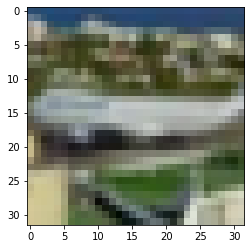

In [22]:
plt.imshow(X_train_shaped[0])

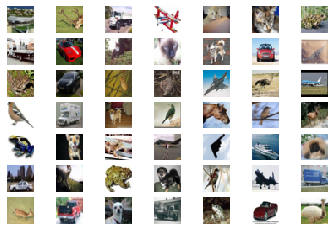

In [23]:
for i in range(49):
    # define subplot
    plt.subplot(7, 7, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow(X_train_shaped[i])
plt.show()

In [0]:
params={'n_estimators':[100,200,300],
            'max_depth': (3,5,7,9)}

In [0]:
X_train_half = X_train[:8000]
y_train_half = y_train[:8000]

In [13]:
rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid=params, cv=5)
clf.fit(X_train_half,y_train_half)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [26]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.40425

In [14]:
print(clf.best_params_)

{'max_depth': 9, 'n_estimators': 300}


In [0]:
import xgboost as xgboost
xgb = xgboost.XGBClassifier(objective='multi:softmax', num_class=10)

In [0]:
xgb_parameters = {
  'max_depth': [3,5,7],
  'learning_rate':[0.01,0.05,0.1,0.2]
}

In [29]:
xgb_model = GridSearchCV(xgb, xgb_parameters, cv=5, n_jobs=-1)
xgb_model.fit(X_train_half,y_train_half)
#The above process run more than 5 hours therefore we modified to the below version

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

In [0]:
xgb_model.best_params_

In [0]:
xgb_model.best_score_

In [0]:
y_pred1 = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred1)

Below is the modified version

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

dataset = fetch_openml('CIFAR_10_small')
X,y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)
X_train_shaped = X_train.reshape(16000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X_test_shaped = X_test.reshape(4000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

#Since the XGBoost takes a long time we have made the following changes to make the process faster
# 16000 -> reduce to 1000
# max_deph reduce from 3,5,7,9, to 3,5
# n_estimators reduce from 100,200,300 to 5, 10
X_train_half = X_train[:1000]
y_train_half = y_train[:1000]
import xgboost as xgboost
xgb = xgboost.XGBClassifier(objective='multi:softmax', num_class=10)
xgb_parameters = {
  'max_depth': [3,5],
  'n_estimators':[5,10]
}
xgb_model = GridSearchCV(xgb, xgb_parameters, cv=5, n_jobs=-1)
xgb_model.fit(X_train_half,y_train_half)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, num_class=10,
                                     objective='multi:softmax', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'n_estimators': [5, 10]},
             pre_dispatch='2*n_jobs', refit=True

In [0]:
xgb_model.best_params_

{'max_depth': 3, 'n_estimators': 10}

In [0]:
xgb_model.best_score_

0.266

In [0]:
from sklearn.metrics import accuracy_score
y_pred1 = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred1)

0.288

###  Follow the data preprocessing steps from https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models.  Then run a ridge regressionusingα= 0.1.  Make a submission of this prediction, what is the RMSE you get?

In [0]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.linear_model import Lasso
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [0]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [0]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data = pd.get_dummies(all_data)
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [0]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [0]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 110 variables and eliminated the other 178 variables


[207291.41324549 195516.62594643 216701.5504103  ... 282045.10488721
 142132.38128086 140940.50867708]


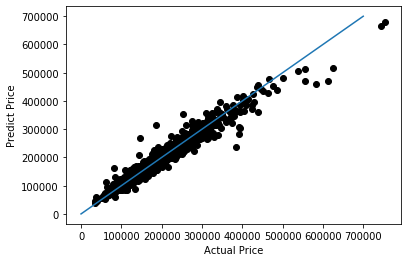

In [0]:
model_ridge = Ridge(alpha = 0.1)
model_ridge.fit(X_train, y)
ypred = model_ridge.predict(X_train)
y_pred = np.expm1(ypred)
print(y_pred)
plt.scatter(np.expm1(y), y_pred, color='black')
plt.xlabel("Actual Price")
plt.ylabel("Predict Price")
plt.plot(range(700000),range(700000))

In [0]:
testset = test['Id']
ypred1 = model_ridge.predict(X_test)
prices = np.expm1(ypred1)

prediction = pd.DataFrame({ 'Id': testset, 'SalePrice': np.round(prices, 3) })
print(prediction.head())
print()
# prediction.to_csv('submission.csv', header=['Id', 'SalePrice'], index=False)

     Id   SalePrice
0  1461  121519.487
1  1462  159637.898
2  1463  187900.728
3  1464  200719.158
4  1465  199280.935



### Score from kaggle is 0.1309

### Compare a ridge regression and a lasso regression model.  Optimize the alphas using cross validation.  What is the best score you can get from a single ridge regression model and from a single lasso model?

In [0]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

In [0]:
bestalpharidge = alphas[cv_ridge.index(min(cv_ridge))]
print("The best alpha from the list is "+str(bestalpharidge))

The best alpha from the list is 10


In [0]:
r1 = Ridge(alpha = 10)
r1.fit(X_train, y)
y_ridge = r1.predict(X_train)

In [0]:
print("The best score I can get from a single Ridge regression is "+str(mean_squared_error(y,y_ridge)))

The best score I can get from a single Ridge regression is 0.011168103229269139


In [0]:
alphas = [1, 0.1, 0.001, 0.0005, 1e-5]
cv_lasso = [rmse_cv(LassoCV(alpha).fit(X_train,y)).mean() for alpha in alphas]

In [0]:
bestalphalasso = alphas[cv_lasso.index(min(cv_lasso))]
print("The best alpha from the list is "+str(bestalphalasso))

The best alpha from the list is 1e-05


In [0]:
l1 = Lasso(alpha = 1e-5)
l1.fit(X_train, y)
y_lasso = l1.predict(X_train)

In [0]:
print("The best score I can get from a single Lasso regression is "+str(mean_squared_error(y,y_lasso)))

The best score I can get from a single Lasso regression is 0.008456918580128136


### Plot the l0 norm (number of nonzeros) of the coefficients that lasso produces asyou vary the strength of regularization parameter alpha.

In [0]:
coef = [LassoCV(alpha).fit(X_train,y).coef_ for alpha in alphas]
l0 = list()
for array in coef:
    l0.append(sum(array != 0))
plt.plot(alphas,l0)
plt.xlabel('Alpha')
plt.ylabel('L0 Norm')
plt.show()

### Add the outputs of your models as features and train a ridge regression on allthe features plus the model outputs (This is called Ensembling and Stacking).  Be careful not to overfit.  What score can you get? 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

X_train_mat = X_train.as_matrix()
kf = KFold(5)
n, d = X_train_mat.shape
X_stacked = np.concatenate([X_train_mat, np.zeros([n, 2])], axis=1)

ridge_mse = []
lasso_mse = []
stack_mse = []

for split_idx, val_idx in kf.split(X_train_mat, y):
  X_split = X_train_mat[split_idx]
  y_split = y[split_idx]
  X_val = X_train_mat[val_idx]
  y_val = y[val_idx]
  

  ridge = Ridge(alpha=10)
  ridge.fit(X_split, y_split)
  ridge_stack = ridge.predict(X_train)
  ridge_pred = ridge.predict(X_val)
  ridge_mse.append(mean_squared_error(y_val, ridge_pred))

  lasso = Lasso(alpha=0.0005)
  lasso.fit(X_split, y_split)
  lasso_stack = lasso.predict(X_train)
  lasso_pred = lasso.predict(X_val)
  lasso_mse.append(mean_squared_error(y_val, lasso_pred))

  X_stacked = np.hstack((X_train_mat, np.reshape(ridge_stack,(-1,1)), np.reshape(lasso_stack,(-1,1))))
  stack = Ridge(alpha=1.0)
  stack.fit(X_split, y_split)
  stack_pred = stack.predict(X_val)
  stack_mse.append(mean_squared_error(y_val, stack_pred))
  
print('Ridge MSE: {}'.format(np.mean(ridge_mse)))
print('Lasso MSE: {}'.format(np.mean(lasso_mse)))
print('Stacked MSE: {}'.format(np.mean(stack_mse)))

Ridge MSE: 0.01646516096612689
Lasso MSE: 0.015295741041401478
Stacked MSE: 0.01752485297420067


### Train a gradient boosting regression, e.g., using XGBoost.  What score can you get just from a single XGB? (you will need to optimize over its parameters). 

In [0]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [0]:
parameters = {'learning_rate': [0.02,0.05,0.1,0.2,0.5], #so called `eta` value
              'max_depth': [2,3,4,5,6],
              'n_estimators': [3,5,7], #number of trees, change it to 1000 for better results
             }

In [0]:
xgb_model = xgb.XGBRegressor()

In [0]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, cv=5)

In [0]:
clf.fit(X_train,y)

[16:32:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=5,
             param_grid={'learning_rate': [0.02, 0.05, 0.1, 0.2, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],

In [0]:
clf.best_params_

{'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 7}

In [0]:
y_boost = clf.predict(X_train)

In [0]:
print("The best score I can get from a single XGBoost regression is "+ str(mean_squared_error(y,y_boost)))

The best score I can get from a single XGBoost regression is 0.026412981051878042


### Do your best to get the more accurate model.  Try feature engineering and stacking many models.  You are allowed to use any public tool in python.  No non-python tools allowed.

In [0]:
X_train['ridge'] = y_ridge
X_train['lasso'] = y_lasso

In [0]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,ridge,lasso
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,0,1,0,0,0,0,1,0,12.243911,12.242725
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,0,1,0,0,0,0,1,0,12.178929,12.185123
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,0,1,0,0,0,0,1,0,12.288364,12.285940
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,0,1,1,0,0,0,0,0,12.033395,12.007866
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,0,1,0,0,0,0,1,0,12.607881,12.594907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,1,0,12.072268,12.083032
1456,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,...,0,1,0,0,0,0,1,0,12.217613,12.255214
1457,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,...,0,1,0,0,0,0,1,0,12.434020,12.549953
1458,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,...,0,1,0,0,0,0,1,0,11.853106,11.866484


In [0]:
xgb_model1 = xgb.XGBRegressor(learning_rate=0.5, max_depth= 4, n_estimators=7)

In [0]:
xgb_model1.fit(X_train,y)

[11:05:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=7,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_stack = xgb_model1.predict(X_train)

In [0]:
print("The best score I can get from this XGBoost regression after doing Ensembling and Stacking is "+ str(mean_squared_error(y,y_stack)))

The best score I can get from this XGBoost regression after doing Ensembling and Stacking is 0.017328308260246287


### Read the Kaggle forums, tutorials and Kernels in this competition.  This is an excellent way to learn.  Include in your report if you find something in the forums you like, or if you madeyour own post or code post, especially if other Kagglers liked or used it afterwards.

### Website: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/111538#latest-651560
### I found this article really interesting since it doesn't use the original data to make preditions, but did something like neural network. He/she adds another layer between the original data and the actual prediction, such as family size, walkabilty and then, uses those attributes associated with the house to make predictions. I don't know if this will increase the performance of the model, but it is really something new to me in terms of the way to process data to make predictions. 

### Website: https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1/notebook?scriptVersionId=12846740

### This article is make use of a few methods that I haven't seen before, they are the Spearman correlation and Johnson Unbounded distribution. The Spearman correlation, are useful in this situation since most of the quantitative data in this model are monotonic which made it possible to take advantage of this correlation model, and pick up relationship between variables even when they are non linear. Next, he used the relationship he finds with Spearman correlation to continue the model. This is useful, since it is always a frustration on how to find the correct variables to train the model. Johnson Unbounded distribution is also useful, since it uses combinations of skewness and kurtosis to fit the data. Thus, it provides a flexible distribution to fit to data by matching these moments. Giving us a enough insight to find out the underlying relationship/ distribution. 

### In addition, I noticed it imported other top kernels submittions to further train his model, may I ask if that is allowed?

### In the rest of the training, he used Lasso regression model, XGBoost model and LGBM model
 